# 8-Queen Problem

### The eight queens puzzle is the problem of placing eight chess queens on an 8×8 chessboard so that no two queens threaten each other

## Chess Notation

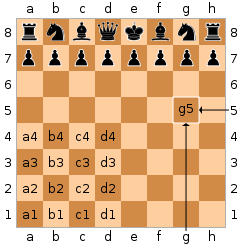

In [9]:
chess_board = chess.Board(None)
Piece = chess.Piece(chess.QUEEN, chess.WHITE)
chess_board.set_piece_at(chess.A8,Piece)
chess_board.set_piece_at(chess.H1,Piece)
chess_board.set_piece_at(chess.A5,Piece)
chess_board.set_piece_at(chess.F5,Piece)

Arrow = [(chess.A8, chess.H1),(chess.A8, chess.A5),(chess.A5, chess.F5)]
SVG(chess.svg.board(board=chess_board, size = 400, arrows = Arrow)) 

NameError: name 'chess' is not defined

In [1]:
import time
from IPython.display import SVG

import chess
import chess.svg

In [2]:
def Solver(board):
    start_time = time.time()
    stack = []
    set_stack = []
    stack.insert(0,board)
    while (len(stack)>0):#run till there are values in the stack
        state = stack.pop(0) #pop the topmost value
        set_stack.append(state)# acts as a explored set
        print("state",state)
        if (number_0(state) == 0):# if there is no space to place a queen on board
            print("solution")
            print(state)#print the current state
            print(time.time()-start_time,"seconds") # gives the total running time of thr program
            return True
            break#end the program (the goal has been reached!)
        else:#if we haven't reached the desired state
            #print("inside else")
            children = expand(state)#call the expand function and store the n=values in children array 
            for every_child in children: #iterate the children array
               # print(every_child,check_safe(every_child))
                if(check_safe(every_child) == True ): #check if the position is safe
                    if(every_child not in set_stack):# check if the state hasn't been explored before
                        stack.insert(0,every_child)#then push it into the stack
            #print(stack)
       
    print("no solution")

In [3]:
def number_0(state):#returns a number (1-8) if there is an empty row or 0 if board has 8 queens
    counter = 0
    for every_col in state:
        if every_col==0:
            return counter
        else:
            counter+=1
    return 0    
        

In [4]:
def check_safe(state):#used to check if there are any colliding queens    
    
    '''checking for any queens on the same row'''
    flag = 0
    counter_zero = 0 #set a counter to find number of zero's in the configuration
    for every_col in state: #check if there are any zero's 
        if(every_col==0): #if yes
            counter_zero+=1  #add 1 to the counter
            flag = 1    #and set flag to one because the set will take zero as a number and we have to remove it as it doesn't gibes us the position of a queen
    set_state = len(set(state)) + counter_zero #a set representation of the state added with the counter to make up for the zeros
    #print(set_state,counter_zero)
    if flag == 1: # if a zero has occured in the state
        set_state -=1 #remove a value from the length as zero wouldn't provide a position for the queen
    if set_state != 8: #if  there are not exactly 8 different numbers return False
        return False
    
    
    '''checking for any queens on diagonals '''
    #else is used to finalize the fact that the there is no conflicting queens in the columns
    # and there will not be queens conflicting in the diagonals
    for i in range (0,8):
        diag1 = []
        counter = 0
        for j in range (0,8):
            if state[i]==0:
                diag_values = 0
            elif(i>j):
                diag_values = 0
            else:    
                diag_values = state[i]+counter
                if(diag_values > 8 or diag_values <1):
                    diag_values = 0
                counter+=1

            diag1.append(diag_values)
        diag1_result = check_diag_conflict(state,diag1)
        if diag1_result == False:
            return False
            #print("false")
        else:
            for i in range(0,8):
                diag2 = []
                counter = 0
                for j in range(0,8):
                    if state[i] == 0:
                        diag_values = 0
                    elif (i>j):
                        diag_values = 0
                    else:
                        diag_values = state[i]-counter
                        if(diag_values > 8 or diag_values <1):
                            diag_values = 0
                        counter+=1 

                    diag2.append(diag_values)
                diag2_result = check_diag_conflict(state,diag2)
                if diag2_result == False:
                    return False
                   # print("false")      

    return True
    #print("true")

In [5]:
def expand(state):
    children = []
    #print("in expand")
    empty_row = number_0(state)# return the row which is empty or 0 if all places are filled
    print(empty_row,"empty row")
    for counter in range(8,0,-1): #
        board1 = list(state)
        board1[empty_row] = counter
        children.append(board1)
        
    return(children)        


In [6]:
def check_diag_conflict(state,diag1):
    flag = 0
    print(state,diag1)
    for i in range(0,8):
        if state[i]==0:
            continue
        elif(state[i]==diag1[i]):
            flag+=1
            
    #print(flag)        
    if flag>1:
        return False
    else:
        return True

In [7]:
board = [0,0,0,0,0,0,0,0]
start_col = int(input("enter the row in which you want to start the search:\t"))
print(start_col)
board[0] = start_col
print(board)

enter the row in which you want to start the search:	1
1
[1, 0, 0, 0, 0, 0, 0, 0]


In [8]:
Solver(board)

state [1, 0, 0, 0, 0, 0, 0, 0]
1 empty row
[1, 8, 0, 0, 0, 0, 0, 0] [1, 2, 3, 4, 5, 6, 7, 8]
[1, 8, 0, 0, 0, 0, 0, 0] [1, 0, 0, 0, 0, 0, 0, 0]
[1, 8, 0, 0, 0, 0, 0, 0] [0, 8, 7, 6, 5, 4, 3, 2]
[1, 8, 0, 0, 0, 0, 0, 0] [0, 0, 0, 0, 0, 0, 0, 0]
[1, 8, 0, 0, 0, 0, 0, 0] [0, 0, 0, 0, 0, 0, 0, 0]
[1, 8, 0, 0, 0, 0, 0, 0] [0, 0, 0, 0, 0, 0, 0, 0]
[1, 8, 0, 0, 0, 0, 0, 0] [0, 0, 0, 0, 0, 0, 0, 0]
[1, 8, 0, 0, 0, 0, 0, 0] [0, 0, 0, 0, 0, 0, 0, 0]
[1, 8, 0, 0, 0, 0, 0, 0] [0, 0, 0, 0, 0, 0, 0, 0]
[1, 8, 0, 0, 0, 0, 0, 0] [0, 8, 0, 0, 0, 0, 0, 0]
[1, 8, 0, 0, 0, 0, 0, 0] [1, 0, 0, 0, 0, 0, 0, 0]
[1, 8, 0, 0, 0, 0, 0, 0] [0, 8, 7, 6, 5, 4, 3, 2]
[1, 8, 0, 0, 0, 0, 0, 0] [0, 0, 0, 0, 0, 0, 0, 0]
[1, 8, 0, 0, 0, 0, 0, 0] [0, 0, 0, 0, 0, 0, 0, 0]
[1, 8, 0, 0, 0, 0, 0, 0] [0, 0, 0, 0, 0, 0, 0, 0]
[1, 8, 0, 0, 0, 0, 0, 0] [0, 0, 0, 0, 0, 0, 0, 0]
[1, 8, 0, 0, 0, 0, 0, 0] [0, 0, 0, 0, 0, 0, 0, 0]
[1, 8, 0, 0, 0, 0, 0, 0] [0, 0, 0, 0, 0, 0, 0, 0]
[1, 8, 0, 0, 0, 0, 0, 0] [0, 0, 0, 0, 0, 0, 0, 0]
[1, 8, 

[1, 3, 5, 0, 0, 0, 0, 0] [0, 0, 0, 0, 0, 0, 0, 0]
[1, 3, 5, 0, 0, 0, 0, 0] [0, 0, 0, 0, 0, 0, 0, 0]
[1, 3, 5, 0, 0, 0, 0, 0] [0, 0, 0, 0, 0, 0, 0, 0]
[1, 3, 5, 0, 0, 0, 0, 0] [0, 0, 0, 0, 0, 0, 0, 0]
[1, 3, 5, 0, 0, 0, 0, 0] [1, 0, 0, 0, 0, 0, 0, 0]
[1, 3, 5, 0, 0, 0, 0, 0] [0, 3, 2, 1, 0, 0, 0, 0]
[1, 3, 5, 0, 0, 0, 0, 0] [0, 0, 5, 4, 3, 2, 1, 0]
[1, 3, 5, 0, 0, 0, 0, 0] [0, 0, 0, 0, 0, 0, 0, 0]
[1, 3, 5, 0, 0, 0, 0, 0] [0, 0, 0, 0, 0, 0, 0, 0]
[1, 3, 5, 0, 0, 0, 0, 0] [0, 0, 0, 0, 0, 0, 0, 0]
[1, 3, 5, 0, 0, 0, 0, 0] [0, 0, 0, 0, 0, 0, 0, 0]
[1, 3, 5, 0, 0, 0, 0, 0] [0, 0, 0, 0, 0, 0, 0, 0]
[1, 3, 5, 0, 0, 0, 0, 0] [0, 0, 0, 0, 0, 0, 0, 0]
[1, 3, 5, 0, 0, 0, 0, 0] [1, 0, 0, 0, 0, 0, 0, 0]
[1, 3, 5, 0, 0, 0, 0, 0] [0, 3, 2, 1, 0, 0, 0, 0]
[1, 3, 5, 0, 0, 0, 0, 0] [0, 0, 5, 4, 3, 2, 1, 0]
[1, 3, 5, 0, 0, 0, 0, 0] [0, 0, 0, 0, 0, 0, 0, 0]
[1, 3, 5, 0, 0, 0, 0, 0] [0, 0, 0, 0, 0, 0, 0, 0]
[1, 3, 5, 0, 0, 0, 0, 0] [0, 0, 0, 0, 0, 0, 0, 0]
[1, 3, 5, 0, 0, 0, 0, 0] [0, 0, 0, 0, 0, 0, 0, 0]


[1, 3, 5, 8, 2, 4, 0, 0] [0, 0, 0, 0, 0, 4, 3, 2]
[1, 3, 5, 8, 2, 4, 0, 0] [0, 0, 0, 0, 0, 0, 0, 0]
[1, 3, 5, 8, 2, 4, 0, 0] [0, 0, 0, 0, 0, 0, 0, 0]
[1, 3, 5, 8, 2, 4, 0, 0] [0, 3, 4, 5, 6, 7, 8, 0]
[1, 3, 5, 8, 2, 4, 0, 0] [1, 0, 0, 0, 0, 0, 0, 0]
[1, 3, 5, 8, 2, 4, 0, 0] [0, 3, 2, 1, 0, 0, 0, 0]
[1, 3, 5, 8, 2, 4, 0, 0] [0, 0, 5, 4, 3, 2, 1, 0]
[1, 3, 5, 8, 2, 4, 0, 0] [0, 0, 0, 8, 7, 6, 5, 4]
[1, 3, 5, 8, 2, 4, 0, 0] [0, 0, 0, 0, 2, 1, 0, 0]
[1, 3, 5, 8, 2, 4, 0, 0] [0, 0, 0, 0, 0, 4, 3, 2]
[1, 3, 5, 8, 2, 4, 0, 0] [0, 0, 0, 0, 0, 0, 0, 0]
[1, 3, 5, 8, 2, 4, 0, 0] [0, 0, 0, 0, 0, 0, 0, 0]
[1, 3, 5, 8, 2, 4, 0, 0] [0, 0, 5, 6, 7, 8, 0, 0]
[1, 3, 5, 8, 2, 4, 0, 0] [1, 0, 0, 0, 0, 0, 0, 0]
[1, 3, 5, 8, 2, 4, 0, 0] [0, 3, 2, 1, 0, 0, 0, 0]
[1, 3, 5, 8, 2, 4, 0, 0] [0, 0, 5, 4, 3, 2, 1, 0]
[1, 3, 5, 8, 2, 4, 0, 0] [0, 0, 0, 8, 7, 6, 5, 4]
[1, 3, 5, 8, 2, 4, 0, 0] [0, 0, 0, 0, 2, 1, 0, 0]
[1, 3, 5, 8, 2, 4, 0, 0] [0, 0, 0, 0, 0, 4, 3, 2]
[1, 3, 5, 8, 2, 4, 0, 0] [0, 0, 0, 0, 0, 0, 0, 0]


[1, 3, 8, 7, 0, 0, 0, 0] [0, 0, 8, 7, 6, 5, 4, 3]
[1, 3, 8, 6, 0, 0, 0, 0] [1, 2, 3, 4, 5, 6, 7, 8]
[1, 3, 8, 6, 0, 0, 0, 0] [1, 0, 0, 0, 0, 0, 0, 0]
[1, 3, 8, 6, 0, 0, 0, 0] [0, 3, 2, 1, 0, 0, 0, 0]
[1, 3, 8, 6, 0, 0, 0, 0] [0, 0, 8, 7, 6, 5, 4, 3]
[1, 3, 8, 6, 0, 0, 0, 0] [0, 0, 0, 6, 5, 4, 3, 2]
[1, 3, 8, 6, 0, 0, 0, 0] [0, 0, 0, 0, 0, 0, 0, 0]
[1, 3, 8, 6, 0, 0, 0, 0] [0, 0, 0, 0, 0, 0, 0, 0]
[1, 3, 8, 6, 0, 0, 0, 0] [0, 0, 0, 0, 0, 0, 0, 0]
[1, 3, 8, 6, 0, 0, 0, 0] [0, 0, 0, 0, 0, 0, 0, 0]
[1, 3, 8, 6, 0, 0, 0, 0] [0, 3, 4, 5, 6, 7, 8, 0]
[1, 3, 8, 6, 0, 0, 0, 0] [1, 0, 0, 0, 0, 0, 0, 0]
[1, 3, 8, 6, 0, 0, 0, 0] [0, 3, 2, 1, 0, 0, 0, 0]
[1, 3, 8, 6, 0, 0, 0, 0] [0, 0, 8, 7, 6, 5, 4, 3]
[1, 3, 8, 6, 0, 0, 0, 0] [0, 0, 0, 6, 5, 4, 3, 2]
[1, 3, 8, 6, 0, 0, 0, 0] [0, 0, 0, 0, 0, 0, 0, 0]
[1, 3, 8, 6, 0, 0, 0, 0] [0, 0, 0, 0, 0, 0, 0, 0]
[1, 3, 8, 6, 0, 0, 0, 0] [0, 0, 0, 0, 0, 0, 0, 0]
[1, 3, 8, 6, 0, 0, 0, 0] [0, 0, 0, 0, 0, 0, 0, 0]
[1, 3, 8, 6, 0, 0, 0, 0] [0, 0, 8, 0, 0, 0, 0, 0]


[1, 4, 2, 5, 3, 8, 0, 0] [0, 0, 2, 1, 0, 0, 0, 0]
[1, 4, 2, 5, 3, 8, 0, 0] [0, 0, 0, 5, 4, 3, 2, 1]
[1, 4, 2, 5, 3, 8, 0, 0] [0, 0, 0, 0, 3, 2, 1, 0]
[1, 4, 2, 5, 3, 8, 0, 0] [0, 0, 0, 0, 0, 8, 7, 6]
[1, 4, 2, 5, 3, 8, 0, 0] [0, 0, 0, 0, 0, 0, 0, 0]
[1, 4, 2, 5, 3, 8, 0, 0] [0, 0, 0, 0, 0, 0, 0, 0]
[1, 4, 2, 5, 3, 8, 0, 0] [0, 4, 5, 6, 7, 8, 0, 0]
[1, 4, 2, 5, 3, 7, 0, 0] [1, 2, 3, 4, 5, 6, 7, 8]
[1, 4, 2, 5, 3, 7, 0, 0] [1, 0, 0, 0, 0, 0, 0, 0]
[1, 4, 2, 5, 3, 7, 0, 0] [0, 4, 3, 2, 1, 0, 0, 0]
[1, 4, 2, 5, 3, 7, 0, 0] [0, 0, 2, 1, 0, 0, 0, 0]
[1, 4, 2, 5, 3, 7, 0, 0] [0, 0, 0, 5, 4, 3, 2, 1]
[1, 4, 2, 5, 3, 7, 0, 0] [0, 0, 0, 0, 3, 2, 1, 0]
[1, 4, 2, 5, 3, 7, 0, 0] [0, 0, 0, 0, 0, 7, 6, 5]
[1, 4, 2, 5, 3, 7, 0, 0] [0, 0, 0, 0, 0, 0, 0, 0]
[1, 4, 2, 5, 3, 7, 0, 0] [0, 0, 0, 0, 0, 0, 0, 0]
[1, 4, 2, 5, 3, 7, 0, 0] [0, 4, 5, 6, 7, 8, 0, 0]
[1, 4, 2, 5, 3, 7, 0, 0] [1, 0, 0, 0, 0, 0, 0, 0]
[1, 4, 2, 5, 3, 7, 0, 0] [0, 4, 3, 2, 1, 0, 0, 0]
[1, 4, 2, 5, 3, 7, 0, 0] [0, 0, 2, 1, 0, 0, 0, 0]


[1, 4, 6, 8, 2, 7, 3, 0] [0, 0, 0, 8, 7, 6, 5, 4]
[1, 4, 6, 8, 2, 7, 3, 0] [0, 0, 0, 0, 2, 1, 0, 0]
[1, 4, 6, 8, 2, 7, 3, 0] [0, 0, 0, 0, 0, 7, 6, 5]
[1, 4, 6, 8, 2, 7, 3, 0] [0, 0, 0, 0, 0, 0, 3, 2]
[1, 4, 6, 8, 2, 7, 3, 0] [0, 0, 0, 0, 0, 0, 0, 0]
[1, 4, 6, 8, 2, 7, 3, 0] [0, 0, 0, 0, 0, 0, 3, 4]
[1, 4, 6, 8, 2, 7, 3, 0] [1, 0, 0, 0, 0, 0, 0, 0]
[1, 4, 6, 8, 2, 7, 3, 0] [0, 4, 3, 2, 1, 0, 0, 0]
[1, 4, 6, 8, 2, 7, 3, 0] [0, 0, 6, 5, 4, 3, 2, 1]
[1, 4, 6, 8, 2, 7, 3, 0] [0, 0, 0, 8, 7, 6, 5, 4]
[1, 4, 6, 8, 2, 7, 3, 0] [0, 0, 0, 0, 2, 1, 0, 0]
[1, 4, 6, 8, 2, 7, 3, 0] [0, 0, 0, 0, 0, 7, 6, 5]
[1, 4, 6, 8, 2, 7, 3, 0] [0, 0, 0, 0, 0, 0, 3, 2]
[1, 4, 6, 8, 2, 7, 3, 0] [0, 0, 0, 0, 0, 0, 0, 0]
[1, 4, 6, 8, 2, 7, 3, 0] [0, 0, 0, 0, 0, 0, 0, 0]
[1, 4, 6, 8, 2, 7, 3, 0] [1, 0, 0, 0, 0, 0, 0, 0]
[1, 4, 6, 8, 2, 7, 3, 0] [0, 4, 3, 2, 1, 0, 0, 0]
[1, 4, 6, 8, 2, 7, 3, 0] [0, 0, 6, 5, 4, 3, 2, 1]
[1, 4, 6, 8, 2, 7, 3, 0] [0, 0, 0, 8, 7, 6, 5, 4]
[1, 4, 6, 8, 2, 7, 3, 0] [0, 0, 0, 0, 2, 1, 0, 0]


[1, 4, 7, 5, 8, 2, 0, 0] [0, 0, 0, 5, 4, 3, 2, 1]
[1, 4, 7, 5, 8, 2, 0, 0] [0, 0, 0, 0, 8, 7, 6, 5]
[1, 4, 7, 5, 8, 2, 0, 0] [0, 0, 0, 0, 0, 2, 1, 0]
[1, 4, 7, 5, 8, 2, 0, 0] [0, 0, 0, 0, 0, 0, 0, 0]
[1, 4, 7, 5, 8, 2, 0, 0] [0, 0, 0, 0, 0, 0, 0, 0]
[1, 4, 7, 5, 8, 2, 0, 0] [0, 0, 0, 0, 0, 2, 3, 4]
[1, 4, 7, 5, 8, 2, 0, 0] [1, 0, 0, 0, 0, 0, 0, 0]
[1, 4, 7, 5, 8, 2, 0, 0] [0, 4, 3, 2, 1, 0, 0, 0]
[1, 4, 7, 5, 8, 2, 0, 0] [0, 0, 7, 6, 5, 4, 3, 2]
[1, 4, 7, 5, 8, 2, 0, 0] [0, 0, 0, 5, 4, 3, 2, 1]
[1, 4, 7, 5, 8, 2, 0, 0] [0, 0, 0, 0, 8, 7, 6, 5]
[1, 4, 7, 5, 8, 2, 0, 0] [0, 0, 0, 0, 0, 2, 1, 0]
[1, 4, 7, 5, 8, 2, 0, 0] [0, 0, 0, 0, 0, 0, 0, 0]
[1, 4, 7, 5, 8, 2, 0, 0] [0, 0, 0, 0, 0, 0, 0, 0]
[1, 4, 7, 5, 8, 2, 0, 0] [0, 0, 0, 0, 0, 0, 0, 0]
[1, 4, 7, 5, 8, 2, 0, 0] [1, 0, 0, 0, 0, 0, 0, 0]
[1, 4, 7, 5, 8, 2, 0, 0] [0, 4, 3, 2, 1, 0, 0, 0]
[1, 4, 7, 5, 8, 2, 0, 0] [0, 0, 7, 6, 5, 4, 3, 2]
[1, 4, 7, 5, 8, 2, 0, 0] [0, 0, 0, 5, 4, 3, 2, 1]
[1, 4, 7, 5, 8, 2, 0, 0] [0, 0, 0, 0, 8, 7, 6, 5]


[1, 5, 2, 8, 3, 7, 0, 0] [0, 0, 0, 0, 3, 2, 1, 0]
[1, 5, 2, 8, 3, 7, 0, 0] [0, 0, 0, 0, 0, 7, 6, 5]
[1, 5, 2, 8, 3, 7, 0, 0] [0, 0, 0, 0, 0, 0, 0, 0]
[1, 5, 2, 8, 3, 7, 0, 0] [0, 0, 0, 0, 0, 0, 0, 0]
[1, 5, 2, 8, 3, 6, 0, 0] [1, 2, 3, 4, 5, 6, 7, 8]
[1, 5, 2, 8, 3, 4, 0, 0] [1, 2, 3, 4, 5, 6, 7, 8]
[1, 5, 2, 8, 3, 4, 0, 0] [1, 0, 0, 0, 0, 0, 0, 0]
[1, 5, 2, 8, 3, 4, 0, 0] [0, 5, 4, 3, 2, 1, 0, 0]
[1, 5, 2, 8, 3, 4, 0, 0] [0, 0, 2, 1, 0, 0, 0, 0]
[1, 5, 2, 8, 3, 4, 0, 0] [0, 0, 0, 8, 7, 6, 5, 4]
[1, 5, 2, 8, 3, 4, 0, 0] [0, 0, 0, 0, 3, 2, 1, 0]
[1, 5, 2, 8, 3, 4, 0, 0] [0, 0, 0, 0, 0, 4, 3, 2]
[1, 5, 2, 8, 3, 4, 0, 0] [0, 0, 0, 0, 0, 0, 0, 0]
[1, 5, 2, 8, 3, 4, 0, 0] [0, 0, 0, 0, 0, 0, 0, 0]
[1, 5, 2, 8, 3, 4, 0, 0] [0, 5, 6, 7, 8, 0, 0, 0]
[1, 5, 2, 8, 3, 4, 0, 0] [1, 0, 0, 0, 0, 0, 0, 0]
[1, 5, 2, 8, 3, 4, 0, 0] [0, 5, 4, 3, 2, 1, 0, 0]
[1, 5, 2, 8, 3, 4, 0, 0] [0, 0, 2, 1, 0, 0, 0, 0]
[1, 5, 2, 8, 3, 4, 0, 0] [0, 0, 0, 8, 7, 6, 5, 4]
[1, 5, 2, 8, 3, 4, 0, 0] [0, 0, 0, 0, 3, 2, 1, 0]


[1, 5, 8, 2, 4, 0, 0, 0] [0, 0, 0, 0, 4, 3, 2, 1]
[1, 5, 8, 2, 4, 0, 0, 0] [0, 0, 0, 0, 0, 0, 0, 0]
[1, 5, 8, 2, 4, 0, 0, 0] [0, 0, 0, 0, 0, 0, 0, 0]
[1, 5, 8, 2, 4, 0, 0, 0] [0, 0, 0, 0, 0, 0, 0, 0]
[1, 5, 8, 2, 4, 0, 0, 0] [0, 0, 0, 0, 0, 0, 0, 0]
[1, 5, 8, 2, 4, 0, 0, 0] [1, 0, 0, 0, 0, 0, 0, 0]
[1, 5, 8, 2, 4, 0, 0, 0] [0, 5, 4, 3, 2, 1, 0, 0]
[1, 5, 8, 2, 4, 0, 0, 0] [0, 0, 8, 7, 6, 5, 4, 3]
[1, 5, 8, 2, 4, 0, 0, 0] [0, 0, 0, 2, 1, 0, 0, 0]
[1, 5, 8, 2, 4, 0, 0, 0] [0, 0, 0, 0, 4, 3, 2, 1]
[1, 5, 8, 2, 4, 0, 0, 0] [0, 0, 0, 0, 0, 0, 0, 0]
[1, 5, 8, 2, 4, 0, 0, 0] [0, 0, 0, 0, 0, 0, 0, 0]
[1, 5, 8, 2, 4, 0, 0, 0] [0, 0, 0, 0, 0, 0, 0, 0]
[1, 5, 8, 2, 4, 0, 0, 0] [0, 0, 0, 0, 0, 0, 0, 0]
[1, 5, 8, 2, 4, 0, 0, 0] [1, 0, 0, 0, 0, 0, 0, 0]
[1, 5, 8, 2, 4, 0, 0, 0] [0, 5, 4, 3, 2, 1, 0, 0]
[1, 5, 8, 2, 4, 0, 0, 0] [0, 0, 8, 7, 6, 5, 4, 3]
[1, 5, 8, 2, 4, 0, 0, 0] [0, 0, 0, 2, 1, 0, 0, 0]
[1, 5, 8, 2, 4, 0, 0, 0] [0, 0, 0, 0, 4, 3, 2, 1]
[1, 5, 8, 2, 4, 0, 0, 0] [0, 0, 0, 0, 0, 0, 0, 0]


True

In [9]:
chess_board = chess.Board(None)
Piece = chess.Piece(chess.QUEEN, chess.WHITE)
chess_board.set_piece_at(chess.A1,Piece)
chess_board.set_piece_at(chess.B5,Piece)
chess_board.set_piece_at(chess.C8,Piece)
chess_board.set_piece_at(chess.D6,Piece)
chess_board.set_piece_at(chess.E3,Piece)
chess_board.set_piece_at(chess.F7,Piece)
chess_board.set_piece_at(chess.G2,Piece)
chess_board.set_piece_at(chess.H4,Piece)

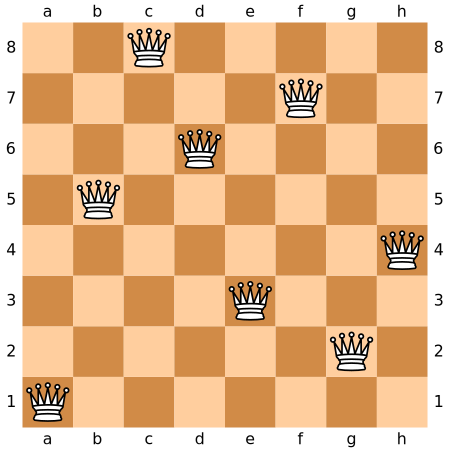

In [10]:
SVG(chess.svg.board(board=chess_board, size = 450)) 